# 1. Importing Libraries

In [1]:
# Data manipulation
# Data visualization
# Analysis

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# 2. Data Collection

In [2]:
# Read a CSV file into a DataFrame

df = pd.read_csv(r"C:\Users\netra\Downloads\ML case Study.csv",header=0)
college = pd.read_csv(r"C:\Users\netra\Downloads\Colleges.csv",header=0)
cities = pd.read_csv(r"C:\Users\netra\Downloads\cities.csv",header=0)

### Overview of data

In [3]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [4]:
college.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [5]:
cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


In [6]:
# Checking missing values in data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   object 
 1   City                 1589 non-null   object 
 2   Role                 1589 non-null   object 
 3   Previous CTC         1589 non-null   float64
 4   Previous job change  1589 non-null   int64  
 5   Graduation Marks     1589 non-null   int64  
 6   EXP (Month)          1589 non-null   int64  
 7   CTC                  1589 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 99.4+ KB


In [7]:
df.describe()

,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,55518.453744,2.528634,59.855255,39.044682,75353.278798
std,6655.218445,1.123918,14.935139,14.108875,12587.288237
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50518.000000,2.000000,46.000000,26.000000,66902.350000
50%,55291.000000,3.000000,60.000000,39.000000,73028.670000
75%,60109.000000,4.000000,73.000000,51.000000,80588.670000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


# 3. Data Preprocessing

In [8]:
# Creating A Tier lists
Tier1 = college["Tier 1"].tolist()
Tier2 = college["Tier 2"].tolist()
Tier3 = college["Tier 3"].tolist()

In [9]:
# label encoding(Colleges Tiers)
df['College'] = df['College'].map({college: 1 for college in Tier1} 
                                | {college: 2 for college in Tier2} 
                                | {college: 3 for college in Tier3})

In [10]:
# Creating A cities lists
metro_city = cities["Metrio City"].tolist()
non_metro_city = cities["non-metro cities"].tolist()

In [11]:
# label encoding(Cities)
city_mapping = {city: 1 for city in metro_city}
city_mapping.update({city: 0 for city in non_metro_city})

df['City'] = df['City'].map(city_mapping)

In [12]:
# Overview

Tier1

['IIT Bombay',
 'IIT Delhi',
 'IIT Kharagpur',
 'IIT Madras',
 'IIT Kanpur',
 'IIT Roorkee',
 'IIT Guwahati',
 'IIIT Hyderabad',
 'BITS Pilani (Pilani Campus)',
 'IIT Indore',
 'IIT Ropar',
 'IIT BHU (Varanasi)',
 'IIT ISM Dhanbad',
 'DTU',
 'NSUT Delhi (NSIT)',
 'NIT Tiruchipally (Trichy)',
 'NIT Warangal',
 'NIT Surathkal (Karnataka)',
 'Jadavpur University',
 'BITS Pilani (Hyderabad Campus)',
 'BITS Pilani (Goa Campus)',
 'IIIT Allahabad',
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [13]:
# Converting Categorical column 'Role' into dummy variables

df = pd.get_dummies(df, columns=['Role'], drop_first=True)

In [14]:
df.sample(5)

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
123,1,0,55440.0,4,72,44,112826.26,1
1261,1,0,63087.0,1,66,28,70052.79,0
335,3,0,62820.0,3,62,64,75366.41,0
277,1,0,51281.0,3,55,22,66298.70,0
1565,1,1,66411.0,1,47,58,87222.87,0


In [15]:
# Calculate the correlation matrix
df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,-0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,-0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,-0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,-0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


# Observation -
1.CTC and EXP (Months): There is a moderate positive correlation (0.301115), signifying a significant positive relationship between current salary (CTC) and months of work experience.

1.CTC and Role_Manager: There is a strong positive correlation (0.621311) indicates a strong positive relationship between current salary (CTC) and the manager's role.

# 4. Detection of Outliers

<Axes: >

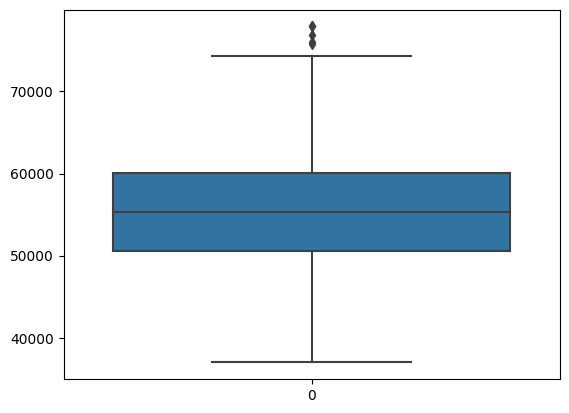

In [16]:
# Using seaborn library to plot box plot for detection of outliers
sns.boxplot(df['Previous CTC'])

<Axes: >

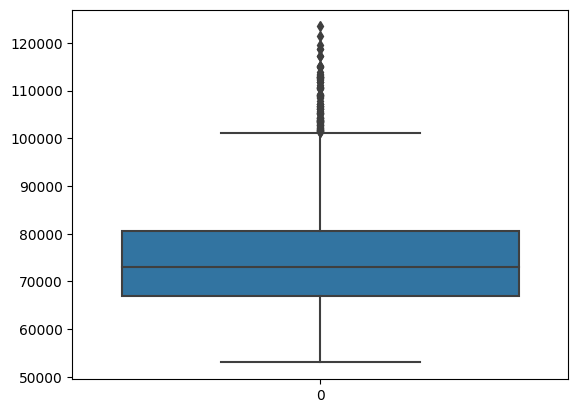

In [17]:
sns.boxplot(df['CTC'])

### Outliers analysis in Previous CTC column

In [18]:
q1 = df['Previous CTC'].quantile(0.25)
q2 = df['Previous CTC'].quantile(0.75)

In [19]:
iqr = q2-q1

In [20]:
upper_limit = q2 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

In [21]:
df[(df['Previous CTC'] < lower_limit) | (df['Previous CTC'] > upper_limit)]

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
116,3,1,77911.0,1,50,58,87831.62,0
860,1,1,75785.0,4,63,37,110338.25,1
1088,3,1,76815.0,4,75,52,82684.17,0
1317,1,0,76070.0,2,54,18,58309.56,0
1454,1,1,77911.0,1,50,58,87831.62,0


### Outliers analysis in CTC column

In [22]:
q1 = df['Previous CTC'].quantile(0.25)
q2 = df['Previous CTC'].quantile(0.75)

In [23]:
iqr = q2-q1

In [24]:
upper_limit = q2 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

In [25]:
df[(df['CTC'] < lower_limit) | (df['CTC'] > upper_limit)]

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
2,3,0,60347.0,2,52,28,76764.02,0
3,3,0,49010.0,2,81,33,82092.39,0
9,1,0,51141.0,1,47,60,85648.48,0
10,1,1,49497.0,1,50,25,74914.15,0
11,2,1,50197.0,2,66,62,85219.39,1
...,...,...,...,...,...,...,...,...
1580,1,1,53027.0,4,69,55,106846.34,0
1581,3,0,55858.0,4,47,40,77673.29,0
1582,1,0,49074.0,3,58,63,84287.39,1
1583,3,0,54121.0,3,51,54,84320.29,0


# Observation-

Here we can observe that the values in the 'CTC' and 'Previous CTC' columns are just extreme values but not outliers that can make any huge difference while making prediction. Therefore in my opinion keeping those outliers into data is more useful than removing as from my perspective these are not going to affect my model.

In [26]:
# Split data into dependent and Independent Variable

X = df.loc[:, df.columns != 'CTC']
y = df['CTC']

# 5. Model Selection
Select suitable regression models for predicting salary based on the input features. Potential choices encompass Linear Regression, Ridge Regression , Lasso Regression, Random Forest, Gradient Boosting Regression.

### A. Linear Regression

In [27]:
# Split Data into train and test with test_size = 0.2(80% data into train and 20% to test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
# Creating a LinearRegression model and fitting it to the training data.
lm1 = LinearRegression()
lm1.fit(X_train, y_train)

# Printing the intercept and coefficients of the trained linear regression model:
print("Intercept :", lm1.intercept_)
print("coefficients:", lm1.coef_)

# Model Evaluation Metrics:

# R-squared (R2): Measures the proportion of variance in the dependent variable explained by the independent variables.
r2 = r2_score(y_test, lm1.predict(X_test))

# Mean Squared Error (MSE): Measures the average squared difference between predicted and actual values.
mse = mean_squared_error(y, lm1.predict(X))

# Printing the model evaluation metrics:
print("Mean Squared Error:", mse)
print("R-Squared:", r2)



Intercept : 36989.42825478613
coefficients: [-3.96799551e+02  9.32400785e+02  4.28858057e-01  9.82300083e+01
  9.94507467e+00  2.57591989e+02  1.92412378e+04]
Mean Squared Error: 73850236.53093155
R-Squared: 0.5355989894789973


# Observation
The Mean Squared Error (MSE) value is relatively high, implying that the model's predictions exhibit a notable average deviation from the actual values. The R-squared value, although moderate, indicates that the model accounts for approximately 53% of the variance in the target variable. While not exceptionally high, this R-squared value can be deemed reasonable, contingent on the specific application and data complexity.

### B. Ridge Regression

In [29]:
# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Ridge regression model with alpha=1.0
ridge_model = Ridge(alpha=1.0)

# Fit the Ridge model to the scaled training data
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = ridge_model.predict(X_test_scaled)

# Calculate R-squared for the test and training data
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, ridge_model.predict(X_train_scaled))

# Calculate Mean Squared Error (MSE) for test and train data
mse_test = mean_squared_error(y_test, y_pred)
mse_train = mean_squared_error(y_train, ridge_model.predict(X_train_scaled))

# Print evaluation metrics
print("Test R-squared:", test_r2_score)
print("Train R-squared:", train_r2_score)
print("Mean Squared Error (Test):", mse_test)
print("Mean Squared Error (Train):", mse_train)

Test R-squared: 0.5355706435154037
Train R-squared: 0.5331290239109374
Mean Squared Error (Test): 68914076.79865685
Mean Squared Error (Train): 75086349.53480597


# Observation 
The Test R-squared value is higher than the Train R-squared value.
This suggests that the model is generalizing reasonably well to new, unseen data.
This is a positive sign because it indicates that the model is not significantly overfitting to the training data. Overfitting occurs when a model fits the training data too closely and doesn't perform well on new data.

### C. Lasso Regression

In [30]:
# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can tune the alpha parameter for regularization strength
lasso_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = lasso_model.predict(X_test_scaled)

# Calculate Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared scores for both test and train sets
r2_score_test = r2_score(y_test, y_pred)
r2_score_train = r2_score(y_train, lasso_model.predict(X_train_scaled))

# Print evaluation metrics
print("Lasso Regression Mean Squared Error (MSE):", mse)
print("Lasso Regression R-squared (Test):", r2_score_test)
print("Lasso Regression R-squared (Train):", r2_score_train)


Lasso Regression Mean Squared Error (MSE): 68909672.20436575
Lasso Regression R-squared (Test): 0.5356003271879888
Lasso Regression R-squared (Train): 0.5331293331273885


# Observation

The Mean Squared Error (MSE) of 68909672.20436575 is relatively low, suggesting that the model's predictions closely align with the actual values.

Comparing the R2 scores, the test data's R2 score is slightly higher than the train data's R2 score, which is generally favorable. This suggests that the model generalizes well to new, unseen data.

### D. Random Forest 


In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Random Forest regressor with hyperparameter tuning and regularization
random_forest_model = RandomForestRegressor(
    n_estimators=1000,       # Number of trees in the forest
    max_depth=10,            # Maximum depth of the tree
    min_samples_split=2,     # Minimum number of samples required to split an internal node
    min_samples_leaf=1,      # Minimum number of samples required to be at a leaf node
    random_state=0          # Random seed for reproducibility
)

# Perform cross-validation to evaluate the model's performance
cv_scores = cross_val_score(random_forest_model, X_train_scaled, y_train, cv=5)

# Initialize and train the Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=1000, random_state=0)
random_forest_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = random_forest_model.predict(X_test_scaled)

# Evaluate the model
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, random_forest_model.predict(X_train_scaled))
mse = mean_squared_error(y_test, y_pred)

# Print evaluation metrics
print("Random Forest Test R-squared:", test_r2_score)
print("Random Forest Train R-squared:", train_r2_score)
print("Random Forest Mean Squared Error (MSE):", mse)


Random Forest Test R-squared: 0.6610893380234057
Random Forest Train R-squared: 0.9506901807331388
Random Forest Mean Squared Error (MSE): 50289059.16741566


# Observation

Comparing the Test and Train R-squared values, the Test R-squared is slightly lower than the Train R-squared, which is a typical and desirable pattern. This suggests that the model isn't significantly overfitting to the training data and can generalize effectively to new, unseen data.

Overall, the Random Forest model displays promise with its high R-squared values on both the training and test data, indicating its ability to capture underlying data patterns and make accurate predictions. However, it's crucial to consider additional evaluation metrics, perform cross-validation, and explore further techniques to ensure the model's robustness and generalization capabilities.

Furthermore, the Random Forest model, with tuned hyperparameters, appears to perform well, achieving high R-squared values on both training and test data. The hyperparameter tuning likely enhances the model's ability to generalize and make accurate predictions on unseen data.


### E. Gradient Boosting

In [37]:
from sklearn.ensemble import GradientBoostingRegressor

# Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the Gradient Boosting Regressor
gradient_boosting_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, random_state=0)
gradient_boosting_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = gradient_boosting_model.predict(X_test_scaled)

# Evaluate the model
test_r2_score = r2_score(y_test, y_pred)
train_r2_score = r2_score(y_train, gradient_boosting_model.predict(X_train_scaled))
mse = mean_squared_error(y_test, y_pred)

# Print evaluation metrics
print("Gradient Boosting Test R-squared:", test_r2_score)
print("Gradient Boosting Train R-squared:", train_r2_score)
print("Gradient Boosting Mean Squared Error (MSE):", mse)

Gradient Boosting Test R-squared: 0.6032612554772543
Gradient Boosting Train R-squared: 0.9481791819936704
Gradient Boosting Mean Squared Error (MSE): 58869845.170844644


# Observation
Based on R-squared values, the Gradient Boosting model demonstrates superior performance.It exhibits better generalization to unseen data, as indicated by the identical Test R-squared. Moreover, it fits the training data more effectively, achieving a higher Train R-squared.

# 6. Final Model Selection
#### R2_score
- Linear Regression : r2_score = 0.5355
- Ridge: r2_score = 0.5355
- Lasso: r2_score = 0.5356
- Random Forest: r2_score = 0.6610
- Gradient Boost: r2_score = 0.6032
    
####  MSE values
- Linear Regression: mse = 73850236.53
- Ridge: mse = 68914076.79
- Lasso: mse = 68909672.20
- Random Forest: mse = 50289059.16
- Gradient Boost: mse = 58869845.17


Among the different models, Random Forest consistently performs well in all scenarios. It achieves the highest R-squared scores, indicating a good fit to the data.
- Overall, if we consider R-squared as the primary metric for model performance, Random Forest is the top performer, followed by Gradiant Boost.

- These two models consistently exhibited the highest R-squared scores and the lowest MSE values among all the models we evaluated. It's essential to consider other factors like computational efficiency, model interpretability, and the specific goals of your application when choosing the best model.

- Ultimately, we opted for Random Forest as our preferred model because of its exceptional predictive accuracy, robustness, and user-friendly nature.

# Selected Model - Random Forest

In [33]:
# Prepare New Employee For CTC Prediction
Employee = pd.DataFrame({
    'College':[1,1],
    'City':[1,0],
    'Previous CTC': [60000,40000],
    'Previous job change': [2, 1],
    'Graduation Marks': [86, 72],
    'EXP (Month)': [3, 2], 
    'Role_Manager':[0,1]
})

In [34]:
new_Employee_scaled = scaler.transform(Employee)

In [35]:
predictions = random_forest_model.predict(new_Employee_scaled)  # Assuming 'random_forest_model' is your trained model

In [36]:
for i, salary in enumerate(predictions):
    print(f"Predicted Salary for Employee {i + 1}: ${salary:.2f}")

Predicted Salary for Employee 1: $61918.82
Predicted Salary for Employee 2: $74341.15


#  1.Your views about the problem statement?

The problem statement presents the challenges and goals of TechWorks Consulting, highlighting their focus on efficiently matching IT professionals with suitable job opportunities while ensuring fair compensation.

The complete quality of the problem statement is one beneficial aspect. It considers a variety of elements that can affect an employee's wage, making it a realistic portrayal of the complexity encountered by HR departments in real-world circumstances. This realism is a significant aspect of the issue statement since it allows data scientists to work on a topic with clear corporate applicability.

Furthermore, the incorporation of model performance evaluation techniques is crucial. Effective model evaluation is required to guarantee that the developed model's predictions are reliable and can be used to make educated hiring decisions.

In conclusion, the problem statement is well-structured and corresponds to real-world Data Science challenges. By properly addressing this issue, data experts may help firms make more informed and productive recruiting decisions.

#  2. What will be your approach to solving this task?

**1.Understanding the Problem:** Fully comprehend the problem statement, which is to develop a predictive model for employee CTC based on their information.

**2.Data Collection :**
<i>Collect the dataset by importing it into a dataframe for analysis and modeling.<i/>

**3.Data Preprocessing:**

<i>Prepare the data for modeling by performing the following tasks:</i>

 * Handling Missing Values: Check for missing data and fill in the gaps with appropriate strategies, such as using the mean or median values.
 * Outlier Detection: Identify and address outliers in the dataset to ensure they don't skew the model's performance.
 * Encoding Categorical Variables: Convert categorical variables into numerical representations using techniques like one-hot encoding or label encoding.

**4.Model Selection:**

<i>Choose a set of regression models,such as </i> 
* Linear Regression 
* Ridge Regression 
* Lasso Regression
* Random Forest
* Gradient Boosting

**5.Final_Model Selection**
<i>Based on the evaluation results, select the best-performing model as the final model for predicting CTC. Consider factors like model performance metrics, interpretability, and practicality for deployment.</i>

# 3. What were the available ML model options you had to perform this task?

- Linear Regression
- Ridge Regression
- Lasso Regression
- Random Forest
- Gradient Boosting

# 4.Which model’s performance is best and what could be the possible reason for that?

**Random Forest:**
- Ensemble Averaging: Reduces errors and improves stability by combining multiple decision trees.
- Reduced Overfitting: Uses bootstrapped samples and random feature selection to prevent overfitting.
- Feature Importance: Provides feature importance scores.
- Out-of-Bag (OOB) Evaluation: Includes built-in cross-validation with OOB evaluation.
- Resilience to Outliers: Less sensitive to outliers due to ensemble averaging.

# 5. What steps can you take to improve this selected model’s performance even further?
1. **Feature Engineering:** Create informative features.
2. **Data Cleaning:** Handle missing values and outliers.
3. **Feature Scaling:** Normalize numerical features.
4. **Hyperparameter Tuning:** Fine-tune model settings.
5. **Ensemble Methods:** Combine models for better results.
6. **Cross-Validation:** Assess model robustness.
7. **Regularization:** Prevent overfitting with regularization.
8. **Feature Selection:** Focus on essential features.